## ПЗ 2

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
from keras.datasets import cifar10 
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [4]:
classes=['самолет', 'авто', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

num_train, depth, height, width = X_train.shape 
num_test = X_test.shape[0] 
num_classes = np.unique(y_train).shape[0] 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train)
X_test /= np.max(X_test)

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes) 

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


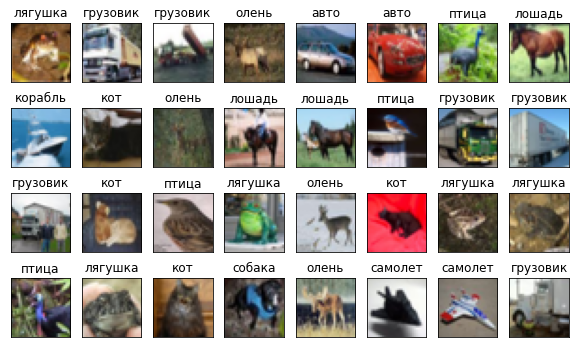

In [8]:
some_samples = X_train[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    y_t = np.argmax(Y_train[j:j+1], axis = 1 )
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,:])
    plt.xticks([]), plt.yticks([])
    plt.title(classes[y_t[0]])
plt.show()

In [11]:
batch_size = 64 
num_epochs = 30  
pool_size = 2 
conv_depth_1 = 32 
conv_depth_2 = 64
conv_depth_3 = 128
drop_prob_1 = 0.25 
drop_prob_2 = 0.5 
hidden_size = 1024 

In [13]:
inp = Input(shape=(depth, height, width))

conv_1 = Convolution2D(filters=(conv_depth_1), kernel_size=(3, 3), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(filters=(conv_depth_1), kernel_size=(3, 3), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

conv_3 = Convolution2D(filters=(conv_depth_2), kernel_size=(3, 3), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(filters=(conv_depth_2), kernel_size=(3, 3), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

conv_5 = Convolution2D(filters=(conv_depth_3), kernel_size=(3, 3), padding='same', activation='relu')(drop_2)
conv_6 = Convolution2D(filters=(conv_depth_3), kernel_size=(3, 3), padding='same', activation='relu')(conv_5)
pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_6)
drop_3 = Dropout(drop_prob_1)(pool_3)

flat = Flatten()(drop_3)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_4 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_4)

model = Model(inputs=inp, outputs=out) 
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy']) 




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928 

In [14]:
history = model.fit(X_train, Y_train, 
          batch_size=batch_size, epochs=num_epochs,
          validation_split=0.1, verbose=1)

plot_history(history)

Epoch 1/30
704/704 [==============================] - 142s 167ms/step - loss: 1.9122 - accuracy: 0.2835 - val_loss: 1.2721 - val_accuracy: 0.5376
Epoch 2/30
704/704 [==============================] - 117s 166ms/step - loss: 1.2742 - accuracy: 0.5328 - val_loss: 1.0346 - val_accuracy: 0.6314
Epoch 3/30
704/704 [==============================] - 119s 168ms/step - loss: 1.0627 - accuracy: 0.6250 - val_loss: 0.9639 - val_accuracy: 0.6680
Epoch 4/30
704/704 [==============================] - 118s 168ms/step - loss: 0.9354 - accuracy: 0.6700 - val_loss: 0.8046 - val_accuracy: 0.7182
Epoch 5/30
704/704 [==============================] - 89s 127ms/step - loss: 0.8586 - accuracy: 0.6963 - val_loss: 0.8341 - val_accuracy: 0.7136
Epoch 6/30
704/704 [==============================] - 108s 154ms/step - loss: 0.7780 - accuracy: 0.7277 - val_loss: 0.7206 - val_accuracy: 0.7532
Epoch 7/30
369/704 [==============>...............] - ETA: 54s - loss: 0.7407 - accuracy: 0.7409

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, Y_test) 

In [ ]:
N = 50
y_p=model.predict(X_test[N:N+1][:,:,:])
y_t = np.argmax(Y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()